In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
rc('font', family='Arial Unicode MS')

In [78]:
customer_list = pd.read_excel("data/온라인쇼핑 요일:시간대별 이용 특징.xlsx")

customer_list

,CRI_YM,TAG,평일휴일,요일,시간대,성별,연령대,건수합계
0,201905,유아용품,평일,목,B.06-10시,F,A.2O대,291
1,202005,생활/사무용품,평일,월,D.14-18시,M,C.4O대,6225
2,201905,골프용품,휴일,일,F.22-02시,M,B.3O대,51
3,202105,화장품,휴일,일,D.14-18시,F,C.4O대,3564
4,202005,인테리어,평일,월,C.10-14시,F,D.5O대,1101
...,...,...,...,...,...,...,...,...
21552,201905,패션,평일,월,F.22-02시,M,C.4O대,2470
21553,202005,골프용품,평일,금,D.14-18시,F,C.4O대,107
21554,202105,스포츠의류용품,평일,화,E.18-22시,M,B.3O대,603
21555,202105,인테리어,평일,화,C.10-14시,F,E.60대이상,415


In [79]:
customer_list['연령대'].value_counts()

연령대
C.4O대      4363
B.3O대      4355
D.5O대      4350
A.2O대      4283
E.60대이상    4206
Name: count, dtype: int64

In [85]:
customer_list[customer_list['연령대']=='A.2O대']

,CRI_YM,TAG,평일휴일,요일,시간대,성별,연령대,건수합계
0,201905,유아용품,평일,목,B.06-10시,F,A.2O대,291
10,202105,차량정비_부품,휴일,토,C.10-14시,M,A.2O대,152
23,202005,패션,평일,금,B.06-10시,F,A.2O대,2510
26,202105,유아용품,휴일,수,A.02-06시,M,A.2O대,11
29,201905,차량정비_부품,평일,금,F.22-02시,M,A.2O대,105
...,...,...,...,...,...,...,...,...
21530,201905,식료품,평일,월,F.22-02시,M,A.2O대,572
21534,202105,골프용품,휴일,토,F.22-02시,F,A.2O대,24
21545,201905,스포츠의류용품,평일,월,B.06-10시,F,A.2O대,111
21547,201905,인테리어,평일,화,E.18-22시,F,A.2O대,652


([<matplotlib.patches.Wedge at 0x17f6be6d0>,
 [Text(0.38763689211508795, 1.0294355928718202, '20대'),
  Text(1.0893205970420636, -0.15290728190613534, '30대'),
  Text(-0.6335811043308472, -0.8992079760738915, '40대'),
  Text(-0.8881405221637964, 0.649004170164275, '50대'),
  Text(-0.22221717219597928, 1.0773205318665484, '60대이상')],
 [Text(0.21143830479004794, 0.5615103233846291, '11.5%'),
  Text(0.5941748711138528, -0.08340397194880109, '31.5%'),
  Text(-0.3455896932713712, -0.4904770778584862, '33.6%'),
  Text(-0.48444028481661616, 0.35400227463505907, '17.0%'),
  Text(-0.12120936665235232, 0.5876293810181172, '6.5%')])

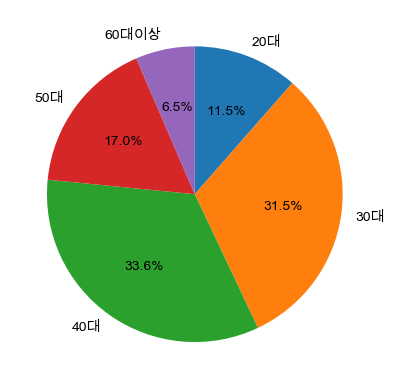

In [123]:
age_sum = [customer_list[customer_list['연령대']=='A.2O대']['건수합계'].sum(),
           customer_list[customer_list['연령대']=='B.3O대']['건수합계'].sum(),
           customer_list[customer_list['연령대']=='C.4O대']['건수합계'].sum(),
           customer_list[customer_list['연령대']=='D.5O대']['건수합계'].sum(),
           customer_list[customer_list['연령대']=='E.60대이상']['건수합계'].sum()]

labels_age=['20대','30대','40대','50대','60대이상']

plt.pie(age_sum, labels=labels_age, autopct='%.1f%%', startangle=90, counterclock=False)

총 구매는 40대가 709,8801(33.6%) 건으로 제일 많았던 것으로 확인된다.

In [101]:
customer_list_40s = customer_list[customer_list['연령대']=='C.4O대']

customer_list_40s

,CRI_YM,TAG,평일휴일,요일,시간대,성별,연령대,건수합계
1,202005,생활/사무용품,평일,월,D.14-18시,M,C.4O대,6225
3,202105,화장품,휴일,일,D.14-18시,F,C.4O대,3564
6,202005,서적,휴일,일,A.02-06시,M,C.4O대,128
17,202105,차량정비_부품,휴일,수,D.14-18시,M,C.4O대,303
22,202105,패션,평일,금,A.02-06시,M,C.4O대,670
...,...,...,...,...,...,...,...,...
21550,202005,식료품,휴일,금,B.06-10시,M,C.4O대,430
21551,201905,패션,휴일,수,F.22-02시,M,C.4O대,796
21552,201905,패션,평일,월,F.22-02시,M,C.4O대,2470
21553,202005,골프용품,평일,금,D.14-18시,F,C.4O대,107


In [116]:
customer_list_40s_M = customer_list_40s[customer_list_40s['성별']=='M']

In [119]:
customer_list_40s_M['시간대'].value_counts()

시간대
D.14-18시    364
A.02-06시    364
B.06-10시    364
E.18-22시    364
F.22-02시    364
C.10-14시    364
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x17f656e50>,
 [Text(0.10690008388883597, 1.0947933010685442, '02~06'),
  Text(0.6566459125516622, 0.8825056065143129, '06~10'),
  Text(0.9975449094711715, -0.46357755940959067, '10~14'),
  Text(-0.6549354364003926, -0.8837757487887, '14~18'),
  Text(-0.8085283079209843, 0.7458431304841724, '18~22')],
 [Text(0.0583091366666378, 0.597159982401024, '3.1%'),
  Text(0.358170497755452, 0.48136669446235236, '14.2%'),
  Text(0.5441154051660935, -0.2528604869506858, '29.3%'),
  Text(-0.35723751076385046, -0.4820594993392909, '27.1%'),
  Text(-0.44101544068417325, 0.40682352571863944, '26.3%')])

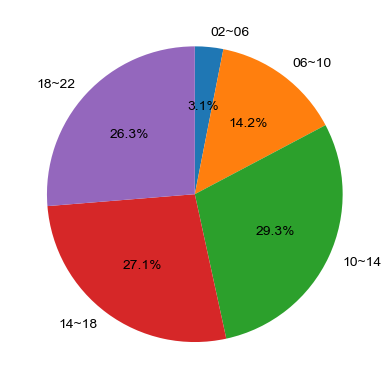

In [122]:
timezone_40s_m = [customer_list_40s_M[customer_list_40s_M['시간대']=='A.02-06시']['건수합계'].sum(),
                  customer_list_40s_M[customer_list_40s_M['시간대']=='B.06-10시']['건수합계'].sum(),
                  customer_list_40s_M[customer_list_40s_M['시간대']=='C.10-14시']['건수합계'].sum(),
                  customer_list_40s_M[customer_list_40s_M['시간대']=='D.14-18시']['건수합계'].sum(),
                  customer_list_40s_M[customer_list_40s_M['시간대']=='E.18-22시']['건수합계'].sum()]

labels_time_40s_m = ['02~06','06~10','10~14','14~18','18~22']

plt.pie(timezone_40s_m,labels=labels_time_40s_m,autopct='%.1f%%', startangle=90, counterclock=False)

In [133]:
customer_list_40s_M['TAG'].value_counts()

TAG
생활/사무용품    156
서적         156
차량정비_부품    156
패션         156
홈쇼핑        156
골프용품       156
화장품        156
인테리어       156
식료품        156
애완용품       156
유아용품       156
취미용품       156
가전         156
스포츠의류용품    156
Name: count, dtype: int64

for i in 